<a href="https://colab.research.google.com/github/24361994/24361994/blob/main/ndvi_arandanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [ ]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

In [ ]:
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
NIR = cv2.imread('/content/drive/My Drive/NDVI/01_arandano.JPG')

* plt.imshow muestra los datos de imagen de matriz X, es decir un raster regular 2D

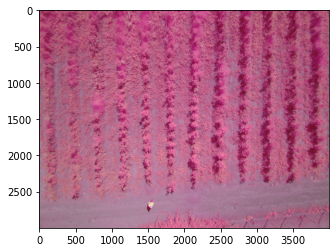

In [ ]:
plt.imshow(NIR)
plt.show()

In [ ]:
hsv_NIR = cv2.cvtColor(NIR, cv2.COLOR_RGB2HSV)

* cv2.cvtColor()El método se utiliza para convertir una imagen de un espacio de color a otro.

* cv2.COLOR_RGB2HSV es la transformación de color de RGB a un espacio de color HSV (donde H= color; S= saturación; V= valor del brillo)


In [ ]:
low_red = np.array([160,105,84])
high_red = np.array([179,255,255])

* se generan dos matrices, las cuales establecen colores especificos

* dentro de esos rangos, los comparare con mi imagen en hsv que igual es una matriz y si esta tiene colores que se encuentran dentro del rango establecido, entonces se conservan y los que no se descartan

In [ ]:
red_mask = cv2.inRange(hsv_NIR, low_red, high_red)

* bitwise: cuando quiero hacer un  analisis bit a bit, ocupo esta funcion. se utiliza en este caso la imagen original que es a la que le voy a aplicar la mascara de valores 255 que genere en el codigo anterior. 

* si no ocupo una mascara y mis imagenes son diferentes, entonces le estoy diciendo que voy a superponer una imagen sobre otra

In [ ]:
result = cv2.bitwise_and(NIR, NIR, mask=red_mask)

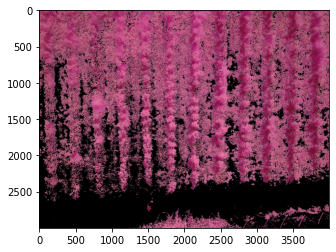

In [ ]:
#plt.subplot(1, 2, 1)
#plt.imshow(red_mask, cmap='gray')
#plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

* antes se utiliza una lista, que me dice que los resultados los analice desde el origen hasta el final y que vaya analizando cada dato y luego lo transforme a otro tipo que seria flotante.
* astype cambia el tipo de datos de los objetos a un tipo de datos especificado, en este caso float
* El método astype () de Python nos permite establecer o convertir el tipo de datos de una columna de datos existente en un conjunto de datos o un marco de datos.

In [ ]:
ir = (result[:,:,0]).astype('float')

* como ya genere la variable ir, ahora genero la variable r, para poder realizar la división de estos dos terminos

* en la primera subtracción me dice que reste ir-r y luego lo divida por la suma de ir+r

In [ ]:
#blue = image[:, :, 2]
#r = np.asarray(blue, float)
r = (result[:,:,2]).astype('float')
ndvi = np.true_divide(np.subtract(ir, r), np.add(ir,r))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
output_name = 'Segmentacion_03arandano.jpg'

* genero una rampa de colores, como lista
* defino la funcion para crear un mapa de color segun los argumentos y para terminar la funcion le indico que me retorne una segmentacion linear de mapa de color, desde una lista con nombre custom1 y que considere los colores de la lista cols3

In [ ]:
cols1 = ['blue', 'green', 'yellow', 'red']
cols2 =  ['gray', 'gray', 'red', 'yellow', 'green']
cols3 = ['gray', 'blue', 'green', 'yellow', 'red']
cols4 = ['black', 'gray', 'blue', 'green', 'yellow', 'red']

def create_colormap(args):
  return LinearSegmentedColormap.from_list(name='custom1', colors=cols3)

* fig.add_axes utiliza un solo parametro que hace referencia a numeros decimales de [izquierda, abajo, ancho, alto]

* plt.colorbar primer termino es opcional, ya que se establece un valor predeterminado en la imagen actual.
* cax es opcional y me dice: ejes en los que se dibujara la barra de colores, se sigue de orientación que me dira como ira la barra. le puedo poner izquierda o derecha y saldria vertical, sino le pongo nada, me arrojaria una barra vertical al lado derecho
* luego se normalizan los atributos de la barra
* ticker.maxNlocator me dice en cuantos ejes divido la barra, me puede indicar decimales

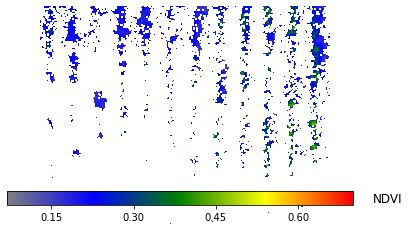

In [ ]:
def create_colorbar(fig, image):
        position = fig.add_axes([0.1, 0.19, 0.8, 0.05])
        norm = colors.Normalize(vmin=-1., vmax=1.)
        cbar = plt.colorbar(image,
                            cax=position,
                            orientation='horizontal',
                            norm=norm)
        cbar.ax.tick_params(labelsize= 10)
        tick_locator = ticker.MaxNLocator(nbins=5)
        cbar.locator = tick_locator
        cbar.update_ticks()
        cbar.set_label("NDVI", fontsize=12, x=1.1, y=2, labelpad=-30)

fig, ax = plt.subplots()
image = ax.imshow(ndvi, cmap=create_colormap(colors))
plt.axis('off')

create_colorbar(fig, image)

#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig(output_name, dpi=600, transparent=True, bbox_inches=extent, pad_inches=0)
# plt.show()

* labelpad: mueve la palabra NDVI en la vertical
* fontsize el tamaño de la etiqueta y x me permite moverlo en la horizontal